Import Libraries

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io
import imageio

print("✅ Libraries imported correctly.")

✅ Libraries imported correctly.


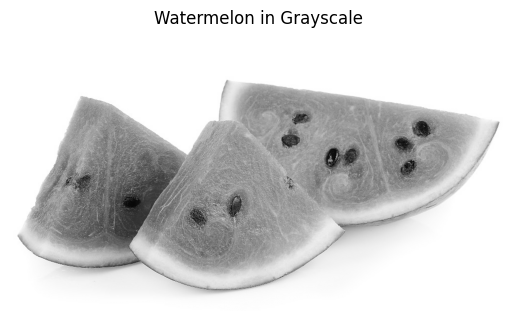

Image properties:
Shape: (549, 976)
Data type: uint8
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [13]:
# Import watermelon image
dir_watermelon = "Imagenes/watermelon.jpg"

# Read the image in grayscale
img_watermelon = cv2.imread(dir_watermelon, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_watermelon, cmap='gray')
plt.title("Watermelon in Grayscale")
plt.axis("off")
plt.show()

# Print the grayscale image array
print("Image properties:")
print("Shape:", img_watermelon.shape)
print("Data type:", img_watermelon.dtype)
print(img_watermelon)


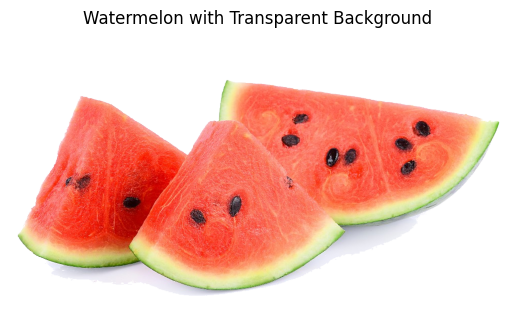

✅ Exported as 'watermelon_no_bg.png'
Image properties:
Shape: (549, 976, 4)
Data type: uint8


In [ ]:
# --- Import watermelon image ---
dir_watermelon = "Imagenes/watermelon.jpg"

# Read the image in color (BGR)
img_watermelon = cv2.imread(dir_watermelon)

# Safety check: make sure the image loaded
if img_watermelon is None:
    raise FileNotFoundError(f"Image not found at {dir_watermelon}")

# Convert to grayscale
gray = cv2.cvtColor(img_watermelon, cv2.COLOR_BGR2GRAY)

# --- Create a mask for the white background ---
# Threshold: values > 240 are treated as white
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

# Invert mask (so watermelon stays visible)
mask_inv = cv2.bitwise_not(mask)

# --- Add alpha channel ---
b, g, r = cv2.split(img_watermelon)
rgba = cv2.merge([b, g, r, mask_inv])

# --- Show result with matplotlib ---
plt.imshow(cv2.cvtColor(rgba, cv2.COLOR_BGRA2RGBA))
plt.title("Watermelon with Transparent Background")
plt.axis("off")
plt.show()

# --- Save the result as PNG with transparency ---
cv2.imwrite("watermelon.png", rgba)

# --- Print properties ---
print("✅ Exported as 'watermelon.png'")
print("Image properties:")
print("Shape:", rgba.shape)   # includes alpha channel (h, w, 4)
print("Data type:", rgba.dtype)
